<a href="https://colab.research.google.com/github/menna03/IMDb-Movies/blob/main/IMDb_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

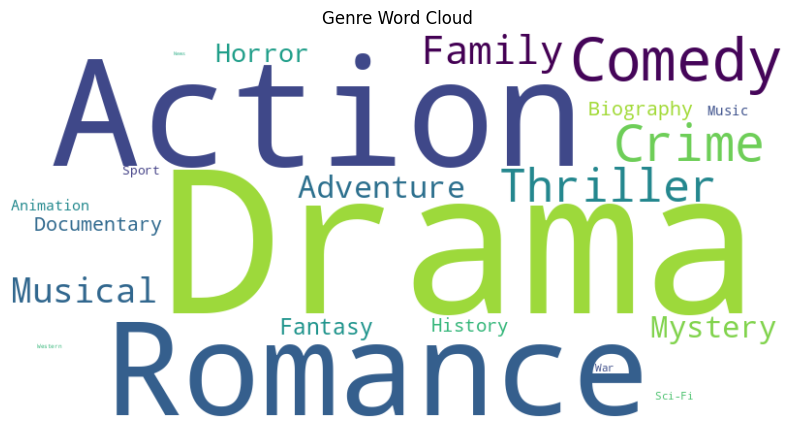

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor


In [107]:
IMDb = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')


In [108]:
IMDb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [109]:
IMDb.duplicated().sum()


6

In [110]:
IMDb=IMDb.drop_duplicates()


In [111]:
IMDb.duplicated().sum()


0

In [112]:
IMDb.isna().sum()* 100 / len(IMDb)


Name         0.000000
Year         3.399342
Duration    53.305812
Genre       12.100884
Rating      48.919564
Votes       48.913114
Director     3.379991
Actor 1     10.417339
Actor 2     15.358318
Actor 3     20.254144
dtype: float64

In [113]:
IMDb.shape


(15503, 10)

In [114]:
IMDb.drop_duplicates(subset=['Name', 'Year'], inplace=True)


In [115]:
IMDb.dropna(subset=['Rating'], inplace=True)


In [116]:
IMDb.shape


(7915, 10)

In [117]:
IMDb.isna().sum()* 100 / len(IMDb)


Name         0.000000
Year         0.000000
Duration    26.102337
Genre        1.276058
Rating       0.000000
Votes        0.000000
Director     0.063171
Actor 1      1.579280
Actor 2      2.526848
Actor 3      3.676563
dtype: float64

In [118]:
IMDb['Duration'] = IMDb['Duration'].str[:-3]


In [119]:
IMDb.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [120]:
IMDb['Duration'] = pd.to_numeric(IMDb['Duration'], errors='coerce')

mean_duration = IMDb['Duration'].mean()
IMDb['Duration'].fillna(mean_duration, inplace=True)

In [121]:
IMDb.dtypes


Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [122]:
IMDb['Year'] = IMDb['Year'].str.replace('(', '').str.replace(')', '')
import re
IMDb['Votes'] = IMDb['Votes'].str.replace(r'\D', '', regex=True)

IMDb['Year'] = pd.to_numeric(IMDb['Year'], errors='coerce')

IMDb['Votes'] = pd.to_numeric(IMDb['Votes'], errors='coerce')


<ipython-input-122-4073b4d88f09>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  IMDb['Year'] = IMDb['Year'].str.replace('(', '').str.replace(')', '')


In [123]:
IMDb.isna().sum()* 100 / len(IMDb)


Name        0.000000
Year        0.000000
Duration    0.000000
Genre       1.276058
Rating      0.000000
Votes       0.000000
Director    0.063171
Actor 1     1.579280
Actor 2     2.526848
Actor 3     3.676563
dtype: float64

In [124]:
IMDb.describe()


,Year,Duration,Rating,Votes
count,7915.000000,7915.000000,7915.000000,7915.000000
mean,1993.333923,132.295777,5.840985,1939.490335
std,20.448393,22.831298,1.381760,11605.267448
min,1917.000000,21.000000,1.100000,5.000000
25%,1980.000000,124.000000,4.900000,16.000000
50%,1997.000000,132.295777,6.000000,55.000000
75%,2011.000000,143.000000,6.800000,404.000000
max,2021.000000,321.000000,10.000000,591417.000000


# VISUALIZATION

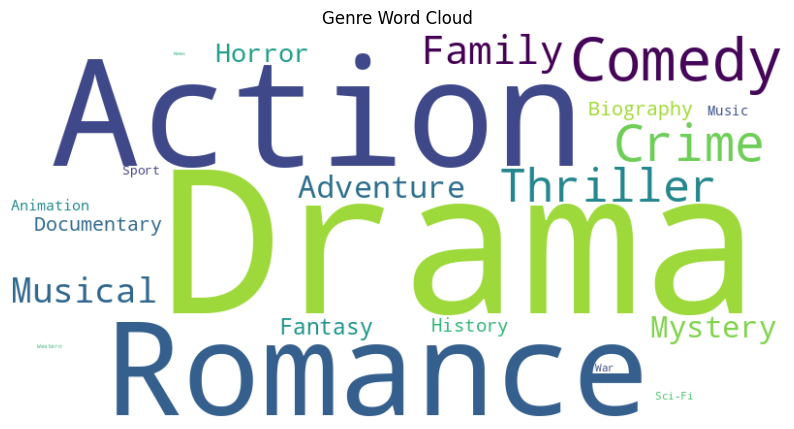

In [126]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genre_counts = IMDb['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()


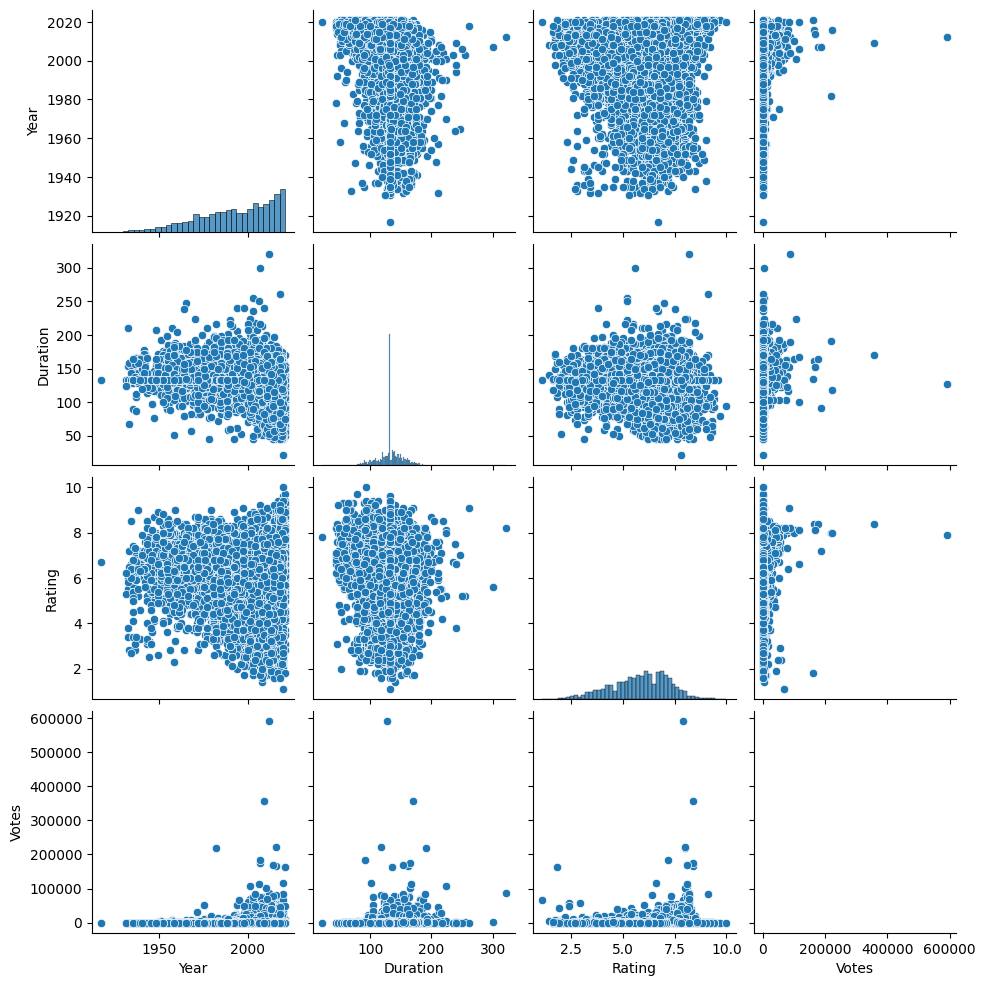

In [131]:
sns.pairplot(IMDb)


# Model

In [134]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named IMDb with object columns that need encoding
object_columns = IMDb.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in object_columns:
    IMDb[column] = label_encoder.fit_transform(IMDb[column])

# Now, the existing columns in your DataFrame IMDb will be replaced with their encoded values.



In [135]:
Input = IMDb.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Output = IMDb['Rating']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)


In [137]:
pip install catboost


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)


In [141]:

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [142]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [143]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [144]:
# XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

In [145]:
# LightGBM Regressor
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 6332, number of used features: 3
[LightGBM] [Info] Start training from score 5.829501


In [146]:
# CatBoost Regressor
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_predictions)
catboost_r2 = r2_score(y_test, catboost_predictions)

Learning rate set to 0.054805
0:	learn: 1.3689469	total: 3.15ms	remaining: 3.15s
1:	learn: 1.3555995	total: 4.75ms	remaining: 2.37s
2:	learn: 1.3429335	total: 6.4ms	remaining: 2.13s
3:	learn: 1.3311347	total: 8.21ms	remaining: 2.04s
4:	learn: 1.3197712	total: 10ms	remaining: 2s
5:	learn: 1.3097240	total: 11.8ms	remaining: 1.96s
6:	learn: 1.3003949	total: 13.4ms	remaining: 1.9s
7:	learn: 1.2911196	total: 15.3ms	remaining: 1.89s
8:	learn: 1.2830823	total: 17.1ms	remaining: 1.88s
9:	learn: 1.2750430	total: 18.9ms	remaining: 1.87s
10:	learn: 1.2679963	total: 20.7ms	remaining: 1.86s
11:	learn: 1.2612345	total: 22.5ms	remaining: 1.85s
12:	learn: 1.2549815	total: 24.4ms	remaining: 1.85s
13:	learn: 1.2498838	total: 26.1ms	remaining: 1.84s
14:	learn: 1.2444388	total: 28ms	remaining: 1.83s
15:	learn: 1.2393781	total: 29.7ms	remaining: 1.83s
16:	learn: 1.2355419	total: 31.5ms	remaining: 1.82s
17:	learn: 1.2308526	total: 33.2ms	remaining: 1.81s
18:	learn: 1.2271475	total: 35ms	remaining: 1.81s
19:

In [147]:

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

In [148]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)



In [149]:
# Print or store the evaluation results for each model
models = ["Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree", "XGBoost", "LightGBM", "CatBoost", "K-Nearest Neighbors", "SVR"]
mse_scores = [lr_mse, rf_mse, gb_mse, dt_mse, xgb_mse, lgbm_mse, catboost_mse, knn_mse, svr_mse]
r2_scores = [lr_r2, rf_r2, gb_r2, dt_r2, xgb_r2, lgbm_r2, catboost_r2, knn_r2, svr_r2]

print("Model\t\t\t\tMSE\t\t\tR2 Score")
print("-" * 70)
for model, mse, r2 in zip(models, mse_scores, r2_scores):
    print(f"{model.ljust(25)}{mse:.4f}\t\t{r2:.4f}")


Model				MSE			R2 Score
----------------------------------------------------------------------
Linear Regression        1.8150		0.0339
Random Forest            1.6485		0.1225
Gradient Boosting        1.4160		0.2463
Decision Tree            2.8340		-0.5085
XGBoost                  1.6381		0.1281
LightGBM                 1.4329		0.2373
CatBoost                 1.4709		0.2171
K-Nearest Neighbors      1.7246		0.0820
SVR                      1.8238		0.0292


In [150]:
# Print or store the evaluation results for each model
models = ["Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree", "XGBoost", "LightGBM", "CatBoost", "K-Nearest Neighbors", "SVR"]
mse_scores = [lr_mse, rf_mse, gb_mse, dt_mse, xgb_mse, lgbm_mse, catboost_mse, knn_mse, svr_mse]
r2_scores = [lr_r2, rf_r2, gb_r2, dt_r2, xgb_r2, lgbm_r2, catboost_r2, knn_r2, svr_r2]

print("Model\t\t\t\tMSE\t\t\tR2 Score")
print("-" * 70)
for model, mse, r2 in zip(models, mse_scores, r2_scores):
    print(f"{model.ljust(25)}{mse:.4f}\t\t{r2:.4f}")


Model				MSE			R2 Score
----------------------------------------------------------------------
Linear Regression        1.8150		0.0339
Random Forest            1.6485		0.1225
Gradient Boosting        1.4160		0.2463
Decision Tree            2.8340		-0.5085
XGBoost                  1.6381		0.1281
LightGBM                 1.4329		0.2373
CatBoost                 1.4709		0.2171
K-Nearest Neighbors      1.7246		0.0820
SVR                      1.8238		0.0292
